# Solving the Knapsack Problem using Genetic Algorithm
This notebook's goal is to show you, how you can use `metapy` in order to solve the Knapsack problem. First, we define the problem properly. The problem is:

Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.(Wikipedia)

In [1]:
# 1 stands for: we are including this item 
candidate = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
values = [69, 21, 33, 50, 89, 58, 27, 95, 52, 68, 26, 84, 46, 28, 25, 81, 82, 27, 50, 61]
weights = [6, 1, 1, 4, 9, 7, 3, 5, 7, 7, 9, 4, 4, 4, 8, 7, 7, 6, 5, 3]

def value(candidate):
    global values, weights

    max_weight = 15
    total_weight = 0

    fitness = 0
    for i, bit in enumerate(candidate):
        if bit == 1:
            total_weight += weights[i]
            fitness += values[i]

    # add penalty for total weights, that are above max weight
    if total_weight > max_weight:
        fitness -= 10 * (total_weight - max_weight)
    return fitness

print("The fitness for our candidate is {}".format(value(candidate)))

The fitness for our candidate is 72


Now that we know, how candidates are looking like and how we can measure the fitness of a candidate we already have enough to try the first optimization algorithm: 
# Genetic Algorithm

In [6]:
import numpy as np
import metapy as mp
from metapy.algorithms import GeneticAlgorithm


class GeneticKnapsackAlgorithm(GeneticAlgorithm):
    def __init__(self, values, weights):
        super().__init__(mutation_rate=0.2,
                         population_size=15, elitism=0, minimize=False)
        
        # We initialize the algorithm with a random population
        # and we pass over the weights and values of each item
        self.population = [np.random.randint(0, 2, 10) for i in range(self.population_size)]
        self.values = values
        self.weights = weights
    
    # This is the same fitness function as above
    def fitness(self, candidate):
        return value(candidate)

    # crossover describes, how we combine 2 or more candidates in order to generate a new one
    def crossover(self, candidates):
        return mp.crossover.uniform_crossover(candidates)
    
    # mutation brings more variation to the population
    def mutation(self, candidate):
        return mp.mutation.bit_flip_mutation(candidate)
    
    # the selection method returns candidates for crossover
    # Better candidates should have higher chance to reproduce themselfes
    def selection(self, fitness):
        return mp.selection.rank_based_selection(self.population, fitness,
                                                 self.selection_size, number_of_parents=2,
                                                 minimize=False)

In [7]:
ga = GeneticKnapsackAlgorithm(values, weights)
res = ga.optimize(max_time=2)
print("Genetic Algorithm result is {} with a fitness of {}.".format(res.solution, res.best_progress[-1]))

Genetic Algorithm result is [1. 0. 1. 1. 1. 1. 0. 0. 0. 1.] with a fitness of 246.


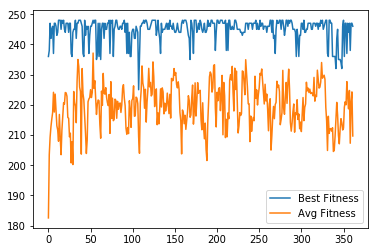

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(len(res.best_progress)), res.best_progress, label="Best Fitness")
plt.plot(np.arange(len(res.averaged_progress)), res.averaged_progress, label="Avg Fitness")
plt.legend()
plt.show()

In [9]:
print(res.function_calls)

{'fitness': 5430, 'crossover': 5430, 'mutation': 4385, 'selection': 362}
